# **Movimiento Browniano Geométrico**

In [2]:
library('dplyr')
library('tidyr')
library('ggplot2')

In [3]:
simMBG <- function(S0, mu, sigma, t=1, nSteps, nReps){
  dt <- t
  # 
  nuT <- (mu - sigma^2/2)*dt
  sigmaT <- sqrt(dt)*sigma
  # 
  simMat <- matrix(nrow=nReps, ncol=(nSteps+1))
  simMat[ ,1] <- S0
  for(i in 1:nReps){
    for(j in 2:(nSteps + 1)){
      simMat[i,j] <- simMat[i,j-1]*exp(nuT + sigmaT*rnorm(1,0,1))
    }
  }
  names <- c('Rep', sapply(0:nSteps, function(i) paste('S',i,sep='')))
  df <- data.frame('Rep'=1:nReps, simMat)
  colnames(df) <- names

  return(df)
}

In [4]:
# Ejemplo
S0 <- 50
mu <- 0.001
sigma <- 0.02
nSteps <- 1000
nReps <- 1000

gbm1 <- simMBG(S0, mu, sigma, t=1, nSteps, nReps)
#print(gbm1)

In [5]:
df <- gbm1 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10)),
         Rep = as.character(Rep))
head(df)


#Media y varianza
moments <- data.frame('t1'=seq(from=0, to=nSteps, length=1)) %>%
  mutate('mean' = S0*exp(mu*t1),  
         'sd_inf' = mean - 2*sqrt(S0^2*exp(2*mu*t1)*(exp(sigma^2*t1 - 1))),
         'sd_sup' = mean + 2*sqrt(S0^2*exp(2*mu*t1)*(exp(sigma^2*t1 - 1)))) 

Rep,Step,value,t
<chr>,<chr>,<dbl>,<dbl>
1,S0,50.00000,0
1,S1,52.36880,1
1,S2,53.30666,2
1,S3,53.18875,3
1,S4,52.76864,4
1,S5,52.90907,5


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



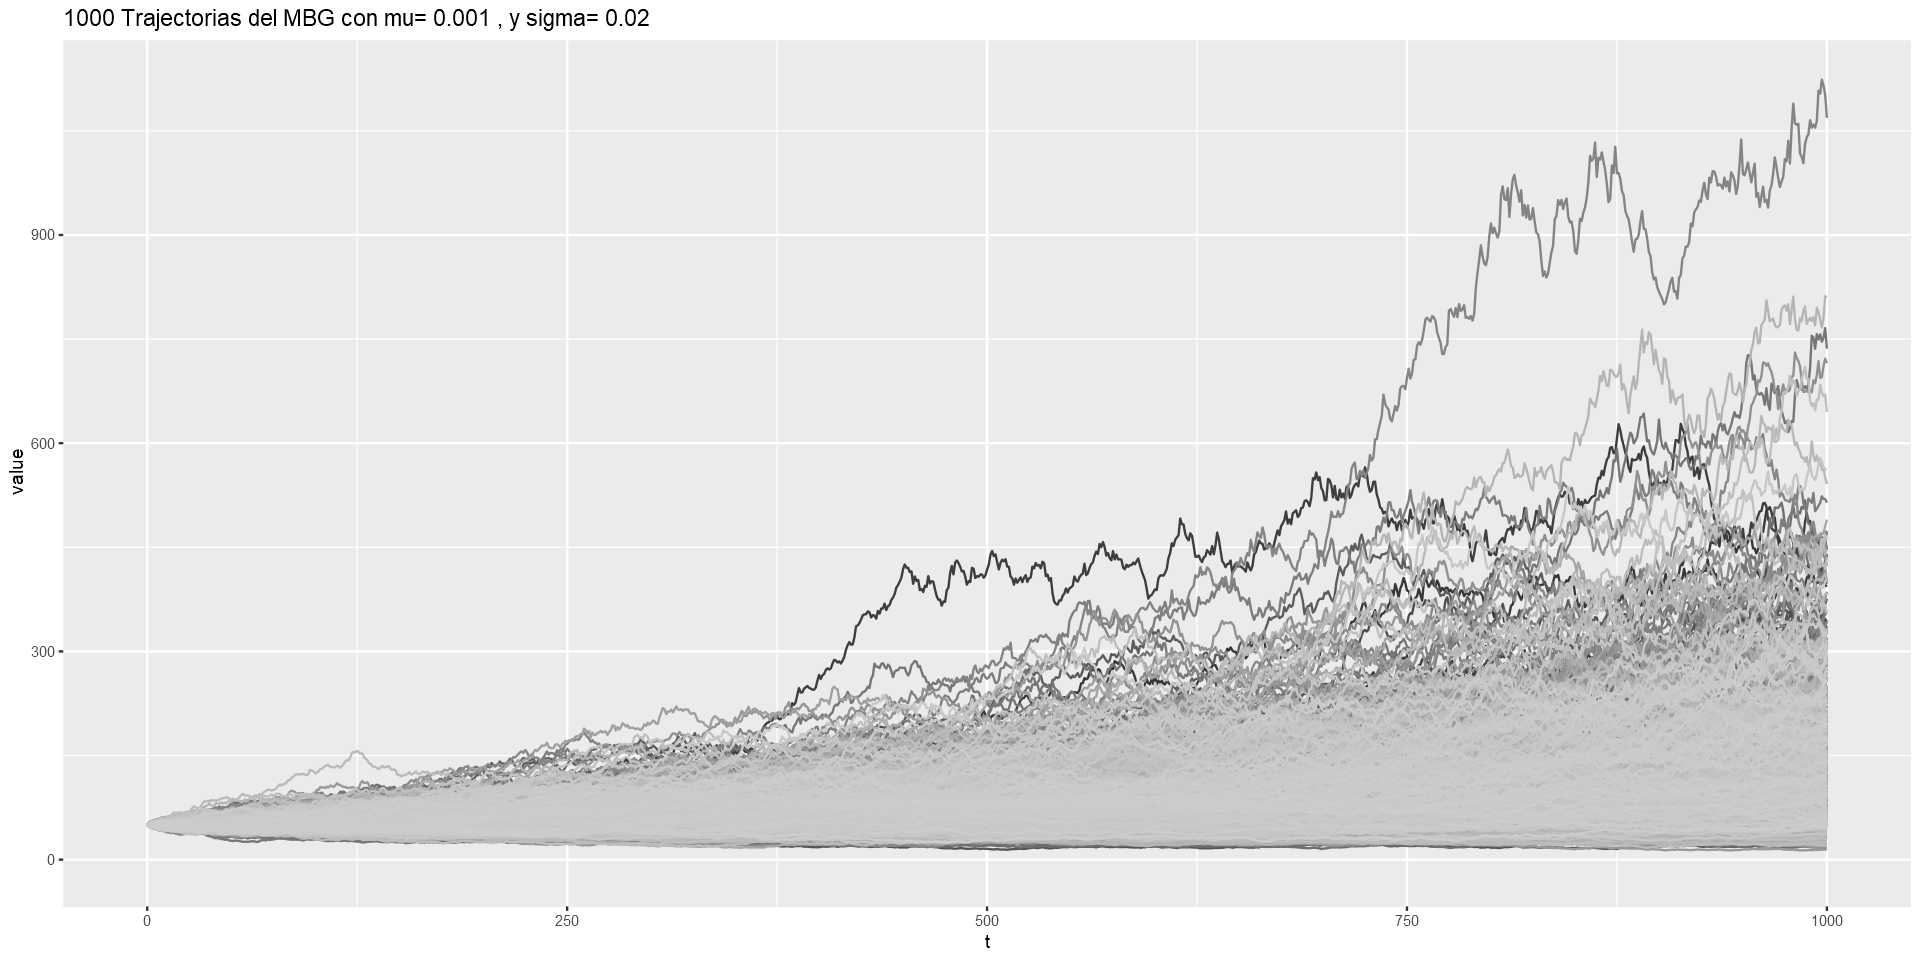

In [6]:
# Gráfico del Movimiento Browniano Geométrico
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, aes(x=t, y=value, color=Rep)) + 
  geom_line() + 
  geom_line(moments, mapping=aes(x=t1,y=mean),col='red',size=0.7, alpha=0.5) +
  geom_line(moments, mapping=aes(x=t1,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  geom_line(moments, mapping=aes(x=t1,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(nReps, "Trajectorias del MBG con mu=", mu, ', y sigma=', sigma)) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p1

# **Modelación**

In [7]:
df <- read.csv('https://raw.githubusercontent.com/JulioCesarMS/StochasticProcesses/main/datasets/DownJones.csv')%>%
  mutate('Date'=as.Date(Date, format="%Y-%m-%d"))%>%
  filter(Date >='2020-01-01')
head(df)

,Date,WMT,MRK,INTC,MSFT,MMM,AAPL,VZ,JNJ,KO,...,NKE,DIS,HD,TRV,RTX,AXP,CVX,JPM,XOM,BA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,118.94,87.82442,60.84,160.62,180.00,75.0875,61.05,145.97,54.99,...,102.20,148.20,219.66,137.51,96.37508,125.85,121.43,141.09,70.90,333.32
2,2020-01-03,117.89,87.07061,60.10,158.62,178.45,74.3575,60.40,144.28,54.69,...,101.92,146.50,218.93,137.02,96.50724,124.60,121.01,138.34,70.33,332.76
3,2020-01-06,117.65,87.44275,59.93,159.03,178.62,74.9500,60.27,144.10,54.67,...,101.83,145.65,219.96,137.17,96.71491,124.06,120.60,138.23,70.87,333.74
4,2020-01-07,116.56,85.11450,58.93,157.58,177.90,74.5975,59.60,144.98,54.25,...,101.78,145.70,218.52,135.16,96.40655,123.41,119.06,135.88,70.29,337.28
5,2020-01-08,116.16,84.54198,58.97,160.09,180.63,75.7975,59.71,144.96,54.35,...,101.55,145.40,221.79,136.61,96.55129,125.54,117.70,136.94,69.23,331.37
6,2020-01-09,117.36,85.28626,59.30,162.09,181.20,77.4075,58.85,145.39,55.34,...,101.48,144.83,225.19,137.62,96.69604,127.81,117.51,137.44,69.76,336.34


In [8]:
# Activos disponibles
print(colnames(df))

 [1] "Date" "WMT"  "MRK"  "INTC" "MSFT" "MMM"  "AAPL" "VZ"   "JNJ"  "KO"  
[11] "CSCO" "PG"   "UNH"  "PFE"  "WBA"  "CAT"  "MCD"  "IBM"  "NKE"  "DIS" 
[21] "HD"   "TRV"  "RTX"  "AXP"  "CVX"  "JPM"  "XOM"  "BA"  


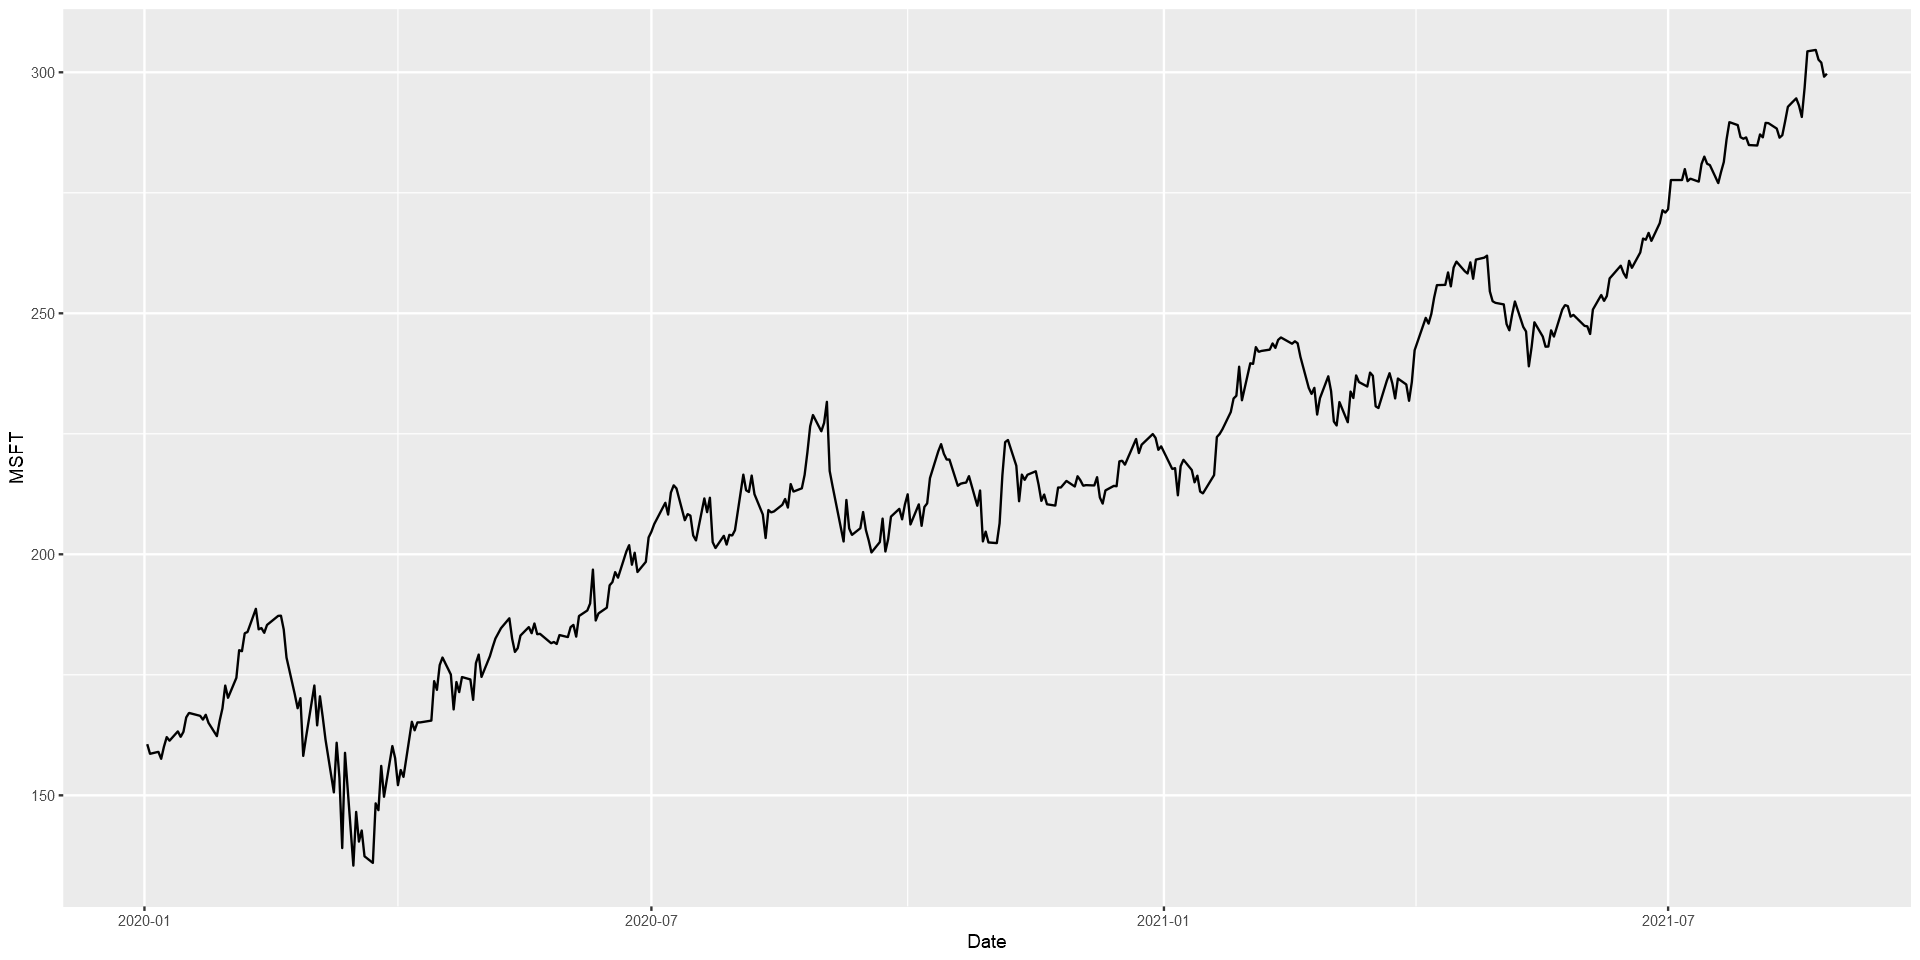

In [9]:
options(repr.plot.width=16, repr.plot.height=8)
# Ejemplo: se seleccionó la compañía AAPL
p1 <- ggplot(df, aes(x=Date, y=MSFT)) +
  geom_line()
p1

# Rendimiento logarítmico
\begin{equation}
rt = ln\left(\frac{P_t}{P_{t-1}}\right)
\end{equation}


In [10]:
# función para calcular el rendimiento simple y logarítmico
getReturns<-function(x, simple=FALSE){
  names<-c(names(x)[-1])
  time<-x[-1,1]
  x<-as.matrix(x[,-1],ncol=ncol(x[,-1]),byrow=FALSE) 
  B<- matrix(ncol=ncol(x),nrow=nrow(x)-1)
  for(i in 1:ncol(x)){
    if(simple){
      B[,i] <- (exp(diff(log(x[,i]),lag=1)) - 1)
    }else{
      B[,i]<-diff(log(x[,i]),lag=1)
    }
    
  }
  B<-data.frame(B)     
  colnames(B)<-names
  C<-data.frame(Date=time,B)
  return(C)
}

In [11]:
# Obtener los rendimientos del activo AAPL
rt <- df%>%select(Date, MSFT)%>%getReturns() 
head(rt)

,Date,MSFT
,<date>,<dbl>
1,2020-01-03,-0.012529922
2,2020-01-06,0.002581482
3,2020-01-07,-0.009159579
4,2020-01-08,0.015802857
5,2020-01-09,0.012415580
6,2020-01-10,-0.004637797


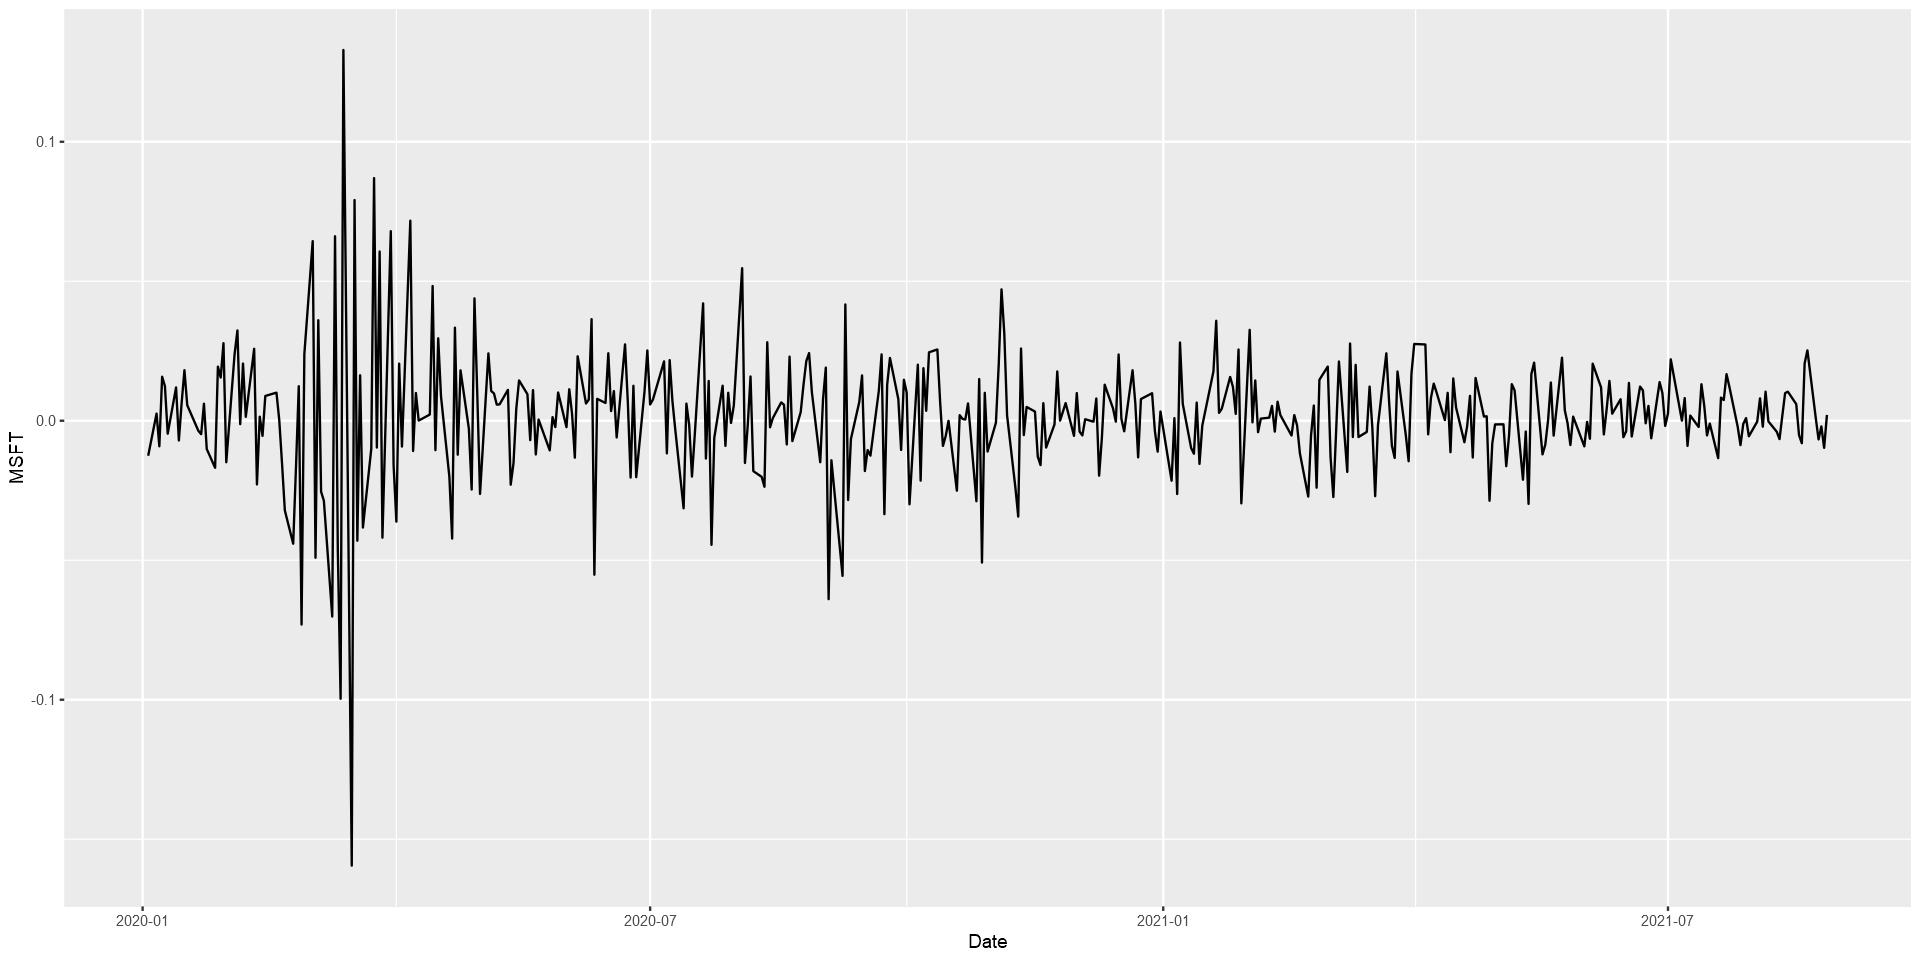

In [12]:
options(repr.plot.width=16, repr.plot.height=8)
# Grálfico de los rendimientos
p2 <- ggplot(rt, aes(x=Date, y=MSFT)) +
  geom_line()
p2

In [13]:
# Aproximación de los prñametros mu y sigma
S0 <- df$MSFT[1]      # precio inicial del activo 
mu <- mean(rt$MSFT) - sd(rt$MSFT)^2/2   # estaimación de mu
sigma <- sd(rt$MSFT)  # estimación de sigma
nSteps <- nrow(df)    # número de periodos a simular
nReps <- 100          # número de trajectorias

In [14]:
# Simulación
gbm2 <- simMBG(S0, mu, sigma,t=1, nSteps, nReps)
#print(gbm2)

In [15]:
# Conersión a formato long para gráficar
df_plot <- gbm2 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10)),
         Rep = as.character(Rep),
         Date = rep(c(df$Date[1]-1, df$Date), nReps))
head(df_plot)

# Media e intervalos de confianza para la media
moments <- data.frame('t1'=seq(from=0, to=nSteps),
                      'Date' = c(df$Date[1]-1, df$Date)) %>%
           mutate('mean' = S0*exp(mu*t1),  
                  'sd_inf' = mean - 2*sqrt(S0^2*exp(2*mu*t1)*(exp(sigma^2*t1 - 1))),
                  'sd_sup' = mean + 2*sqrt(S0^2*exp(2*mu*t1)*(exp(sigma^2*t1 - 1)))) 

Rep,Step,value,t,Date
<chr>,<chr>,<dbl>,<dbl>,<date>
1,S0,160.6200,0,2020-01-01
1,S1,160.7975,1,2020-01-02
1,S2,162.5794,2,2020-01-03
1,S3,158.8810,3,2020-01-06
1,S4,160.6745,4,2020-01-07
1,S5,164.1217,5,2020-01-08


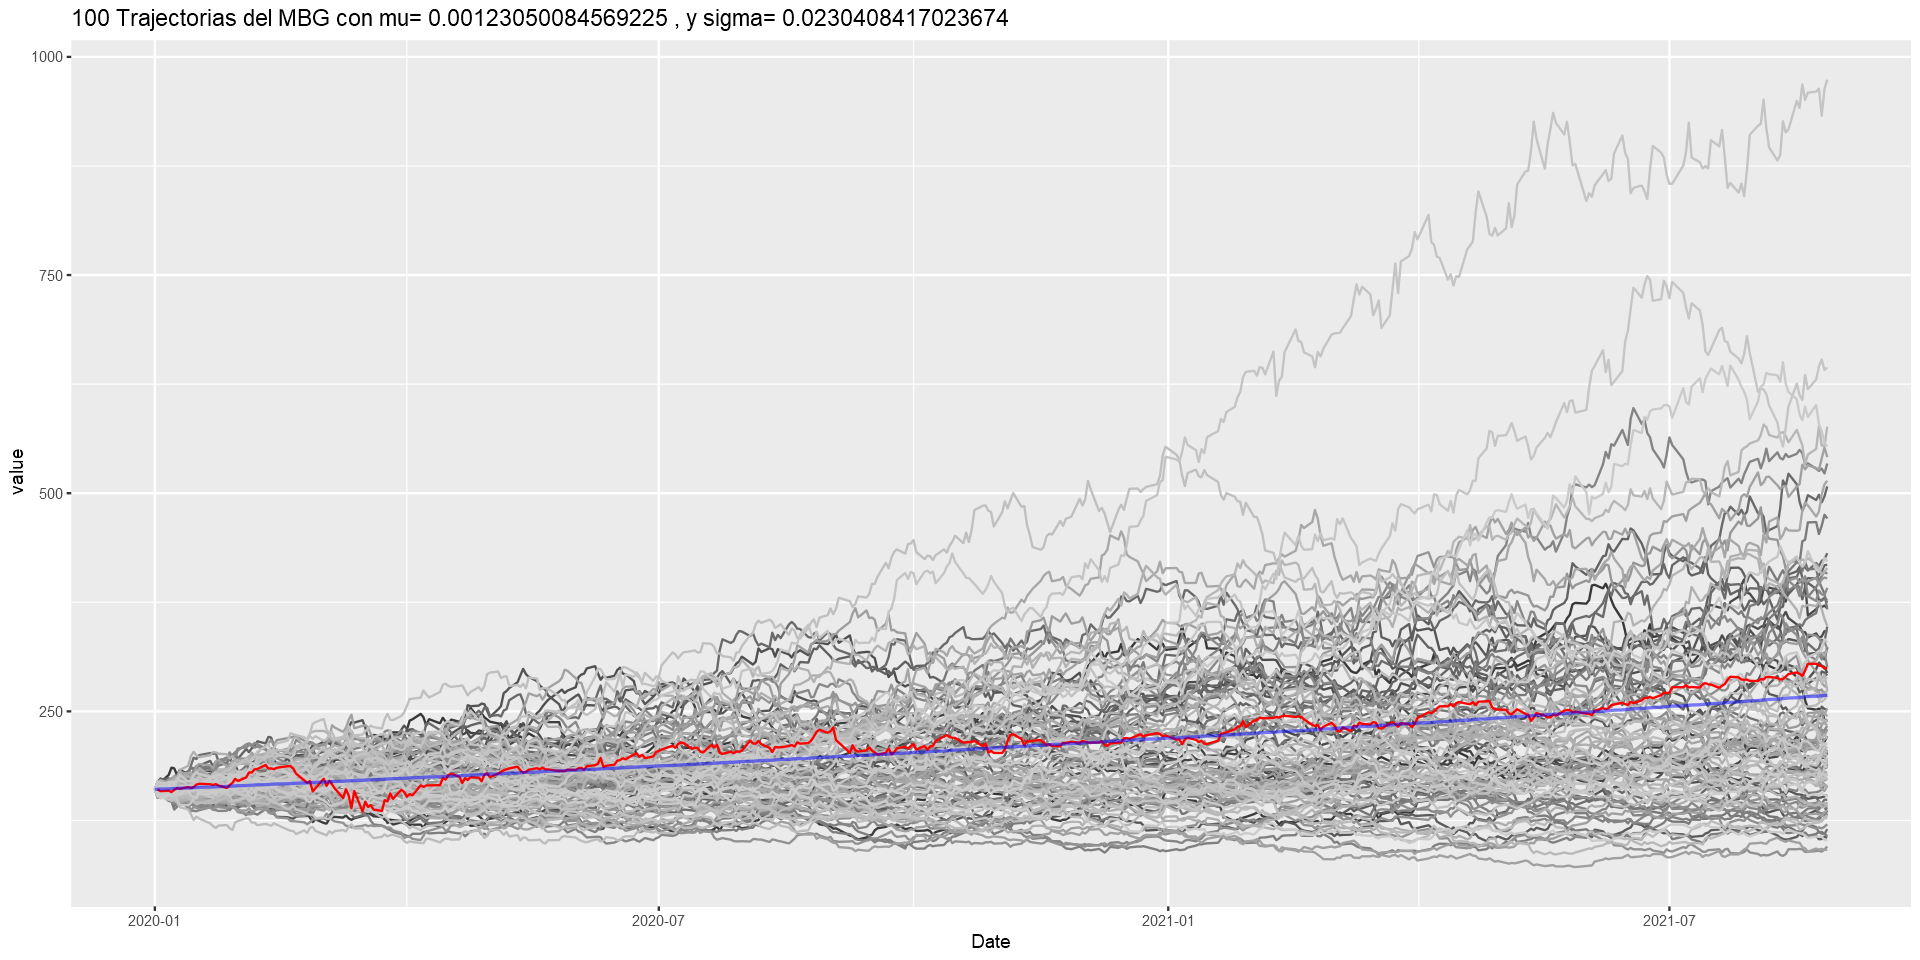

In [16]:
# Gráfico del Movimiento Browniano Geométrico
options(repr.plot.width=16, repr.plot.height=8)
p2 <- ggplot(df_plot, aes()) + 
  geom_line(aes(x=Date, y=value, col=Rep)) + 
  geom_line(df, mapping=aes(x=Date, y=MSFT), color='red') + 
  #ylim(S0, 250)+
  geom_line(moments, mapping=aes(x=Date,y=mean),col='blue',size=0.7, alpha=0.5) +
  labs( title = paste(nReps, "Trajectorias del MBG con mu=", mu, ', y sigma=', sigma)) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p2